In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

sns.set_theme(style = "darkgrid")

In [16]:
df=pd.read_excel("marketing_campaign.xlsx")

In [17]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [19]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

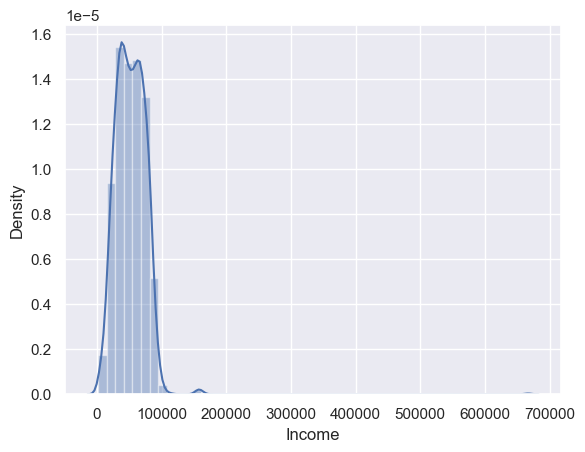

In [20]:
sns.distplot(df['Income'])
plt.show()

In [21]:
# FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
df['Income']=df['Income'].fillna(df['Income'].median())

In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [22]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [23]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

 Dt_Customer indicates the date a customer joined the database so, convert the dtype of the column to datetime

In [26]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Feature Engineering

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [27]:
df['Amount_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [28]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [29]:
df['Children'] = df['Kidhome'] + df['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [30]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner':2}) + df['Children']

 Seperating education levels in three groups

In [31]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [32]:
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Amount_Spent,Living_With,Children,Family_Size,Customer_Age
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,Alone,0,1,67
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,Alone,2,3,70
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,Partner,0,2,59
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,Partner,1,3,40
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,Partner,1,3,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,Partner,1,3,57
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444,Partner,3,5,78
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,Alone,0,1,43
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,Partner,1,3,68


In [33]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']


In [34]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [35]:
df['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [36]:
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1,'Postgraduate':2})
df['Living_With'] = df['Living_With'].map({'Alone':0,'Partner':1})

Dropping some of the unnecessary features

In [37]:
df=df.drop(columns=["Year_Birth","Marital_Status","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",'Dt_Customer','Recency','Complain','Response'],axis=1)

In [38]:
df.head()

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp
0,1,58138.0,1617,0,0,1,67,25,0
1,1,46344.0,27,0,2,3,70,6,0
2,1,71613.0,776,1,0,2,59,21,0
3,1,26646.0,53,1,1,3,40,8,0
4,2,58293.0,422,1,1,3,43,19,0


In [39]:
df.describe()

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.267411,52237.975446,605.798214,0.644643,0.950446,2.595089,55.194196,14.862054,0.297768
std,0.652347,25037.955891,602.249288,0.478728,0.751803,0.906959,11.984069,7.677173,0.678381
min,0.000000,1730.000000,5.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000
25%,1.000000,35538.750000,68.750000,0.000000,0.000000,2.000000,47.000000,8.000000,0.000000
50%,1.000000,51381.500000,396.000000,1.000000,1.000000,3.000000,54.000000,15.000000,0.000000
75%,2.000000,68289.750000,1045.500000,1.000000,1.000000,3.000000,65.000000,21.000000,0.000000
max,2.000000,666666.000000,2525.000000,1.000000,3.000000,5.000000,131.000000,44.000000,4.000000


In [40]:
df.shape

(2240, 9)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         2240 non-null   int64  
 1   Income            2240 non-null   float64
 2   Amount_Spent      2240 non-null   int64  
 3   Living_With       2240 non-null   int64  
 4   Children          2240 non-null   int64  
 5   Family_Size       2240 non-null   int64  
 6   Customer_Age      2240 non-null   int64  
 7   Total_Purchases   2240 non-null   int64  
 8   TotalAcceptedCmp  2240 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 157.6 KB


### Data Visualization

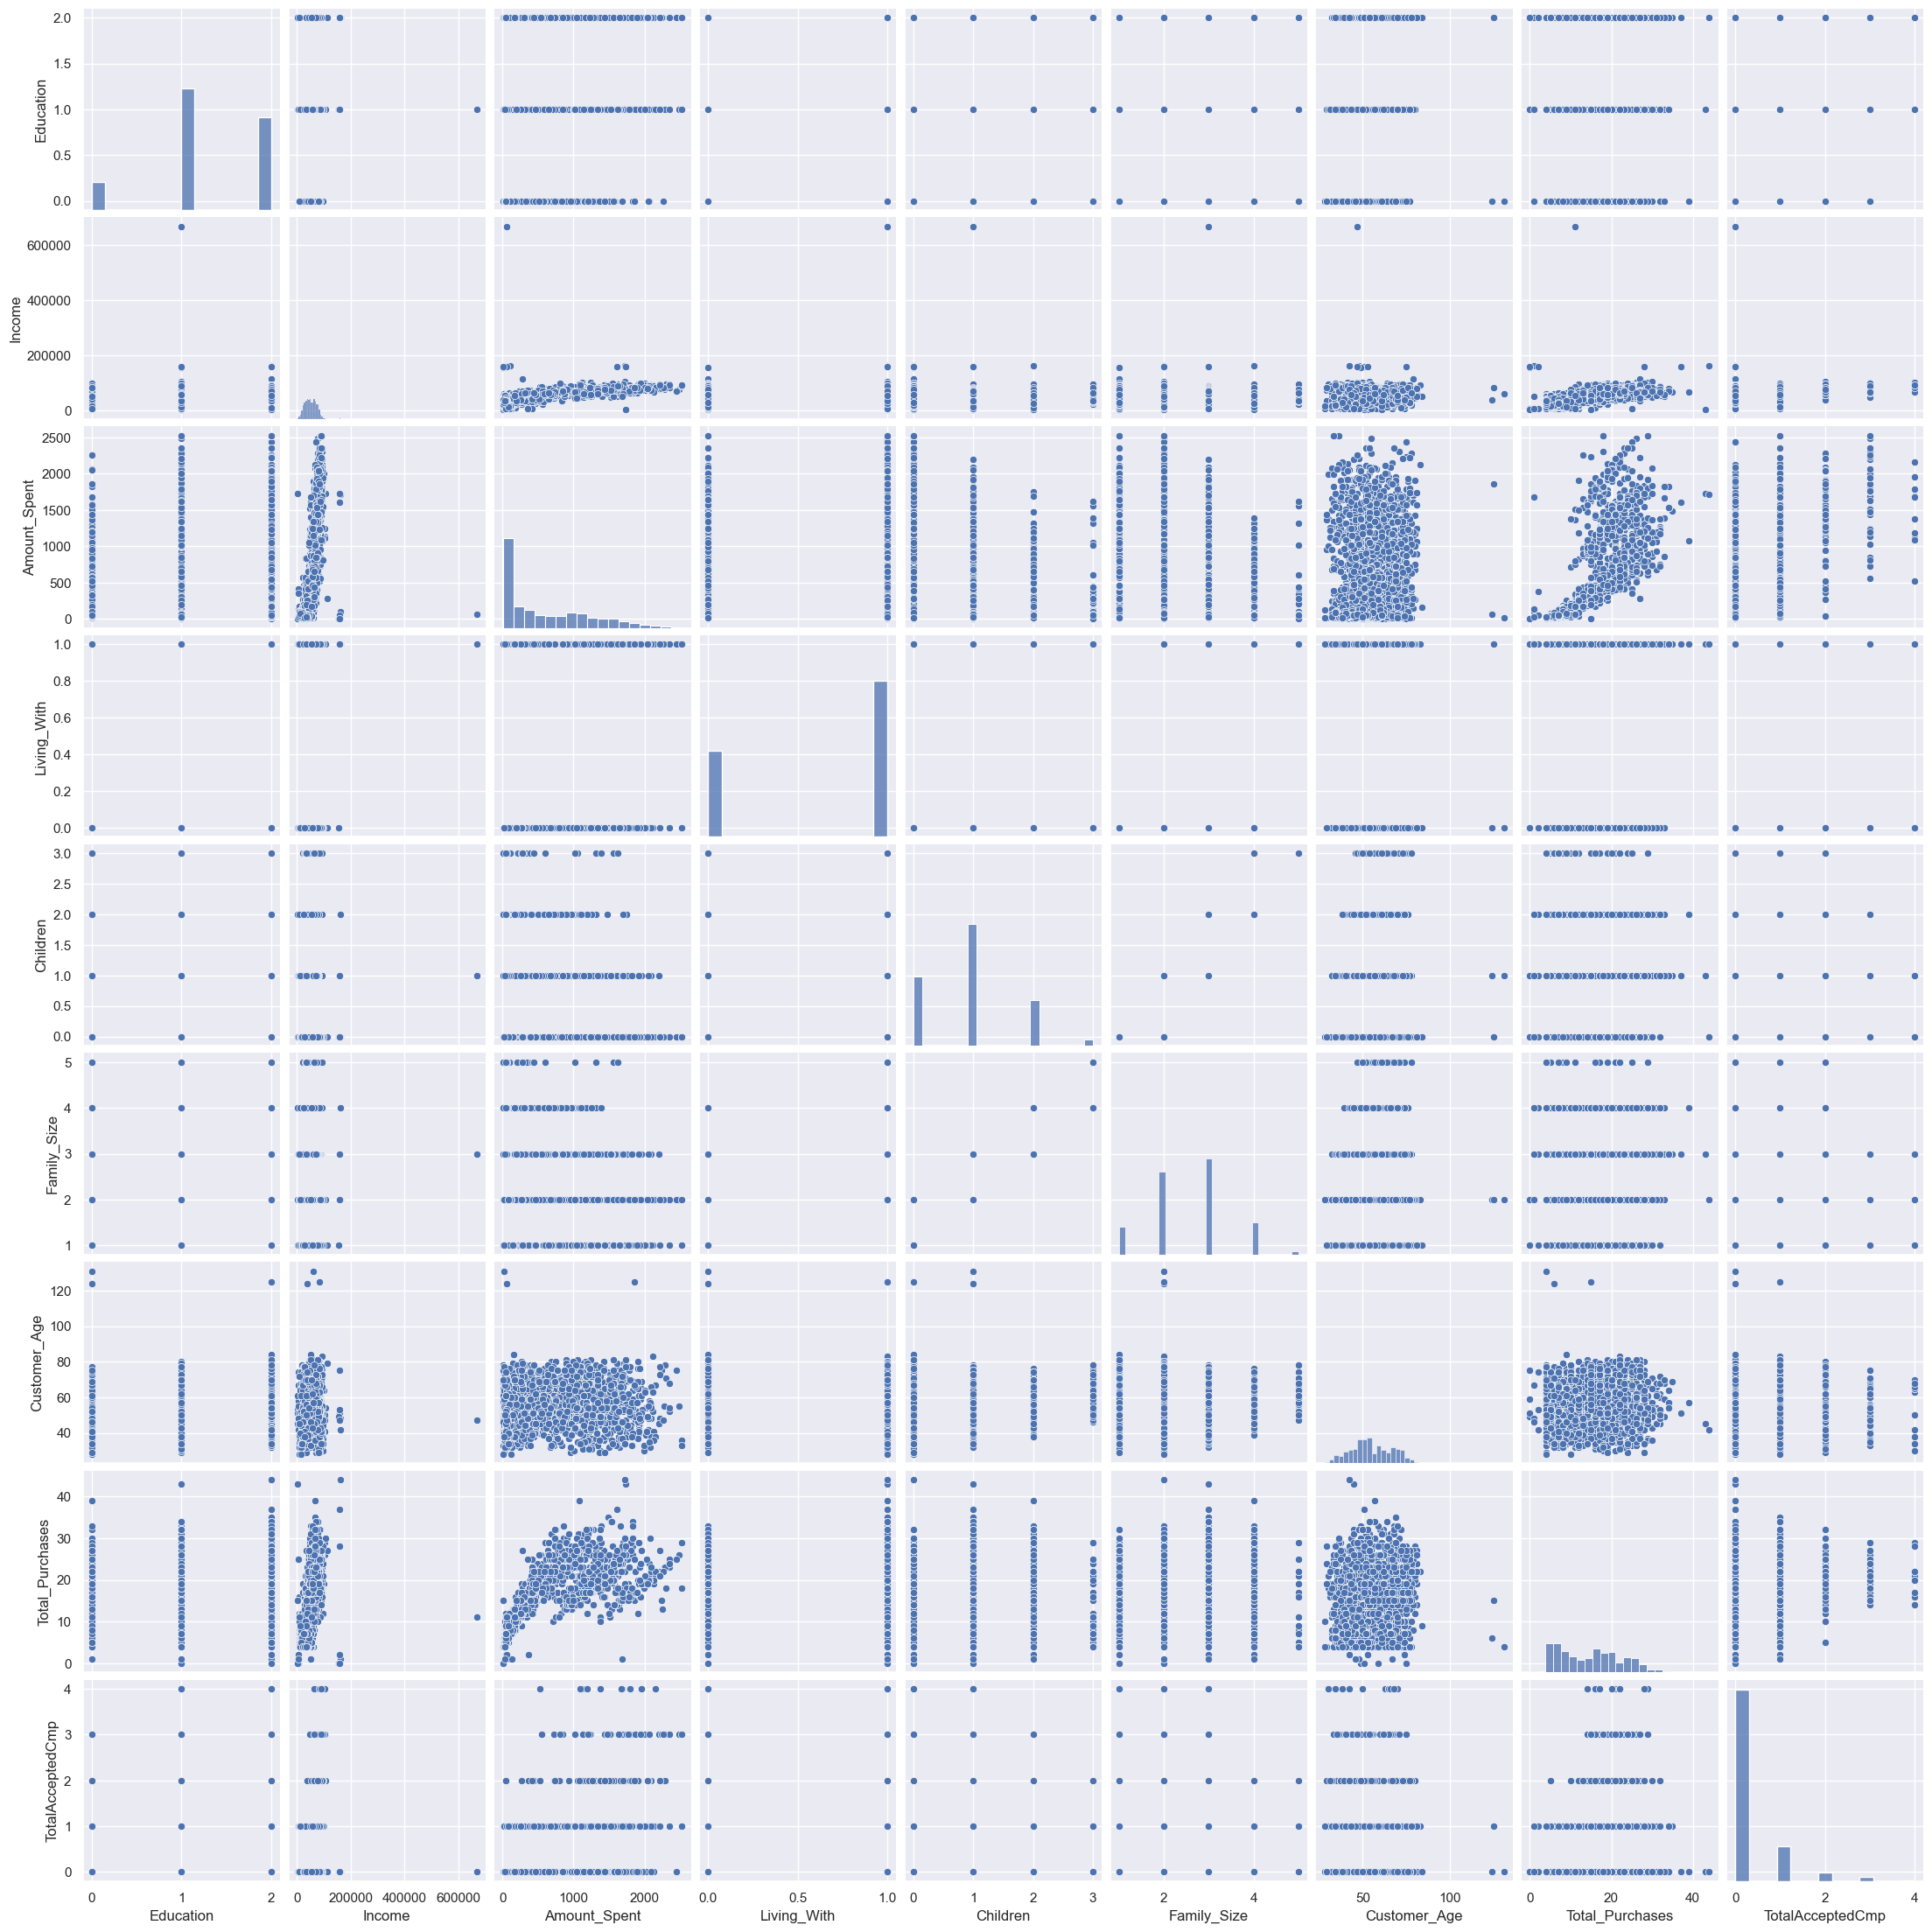

In [42]:
# Pairplot'
sns.pairplot(df)

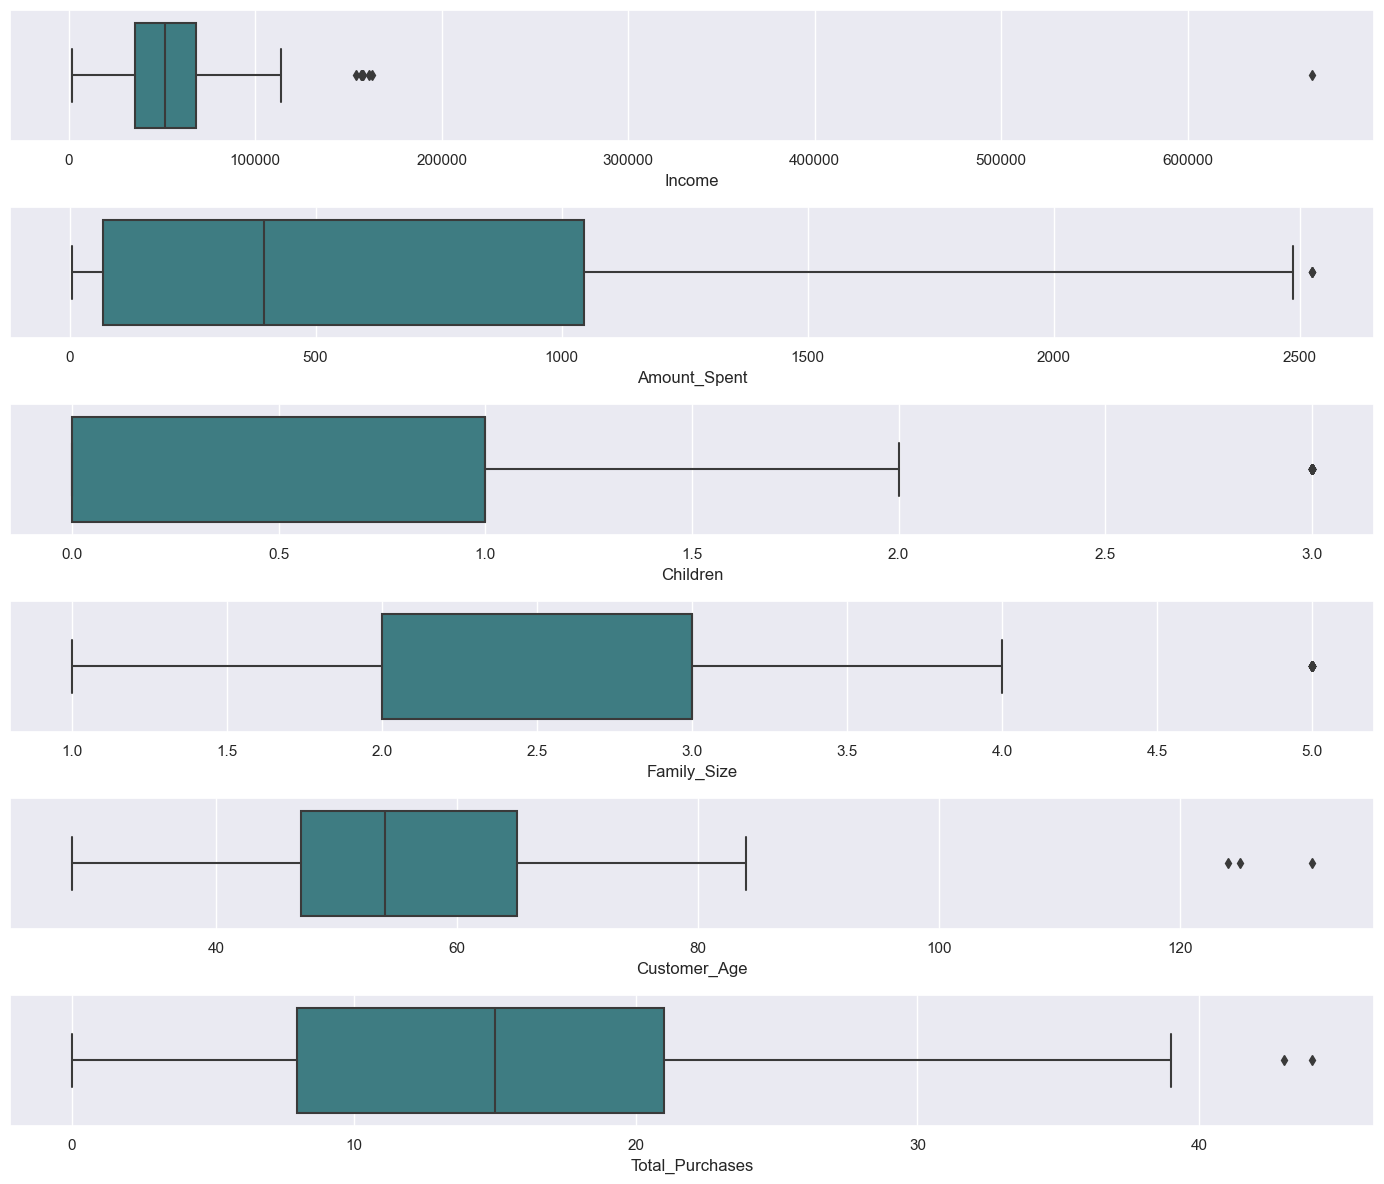

In [43]:
# BoxPLot
fig, axes=plt.subplots(6,1,figsize=(14,12))
sns.boxplot(x='Income',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Amount_Spent',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='Children',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Family_Size',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='Customer_Age',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='Total_Purchases',data=df,palette='crest',ax=axes[5])
plt.tight_layout()

In [44]:
df.corr()

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp
Education,1.000000,0.130344,0.096703,-0.007352,0.057994,0.044192,0.181483,0.101008,0.031929
Income,0.130344,1.000000,0.664775,0.004684,-0.290858,-0.238627,0.160899,0.563450,0.307122
Amount_Spent,0.096703,0.664775,1.000000,-0.017744,-0.498888,-0.422907,0.111306,0.753903,0.459554
Living_With,-0.007352,0.004684,-0.017744,1.000000,0.039158,0.560298,-0.004237,0.006707,0.000032
Children,0.057994,-0.290858,-0.498888,0.039158,1.000000,0.849596,0.090199,-0.245790,-0.244282
Family_Size,0.044192,-0.238627,-0.422907,0.560298,0.849596,1.000000,0.072532,-0.200201,-0.202475
Customer_Age,0.181483,0.160899,0.111306,-0.004237,0.090199,0.072532,1.000000,0.168304,0.000301
Total_Purchases,0.101008,0.563450,0.753903,0.006707,-0.245790,-0.200201,0.168304,1.000000,0.257273
TotalAcceptedCmp,0.031929,0.307122,0.459554,0.000032,-0.244282,-0.202475,0.000301,0.257273,1.000000


<Axes: >

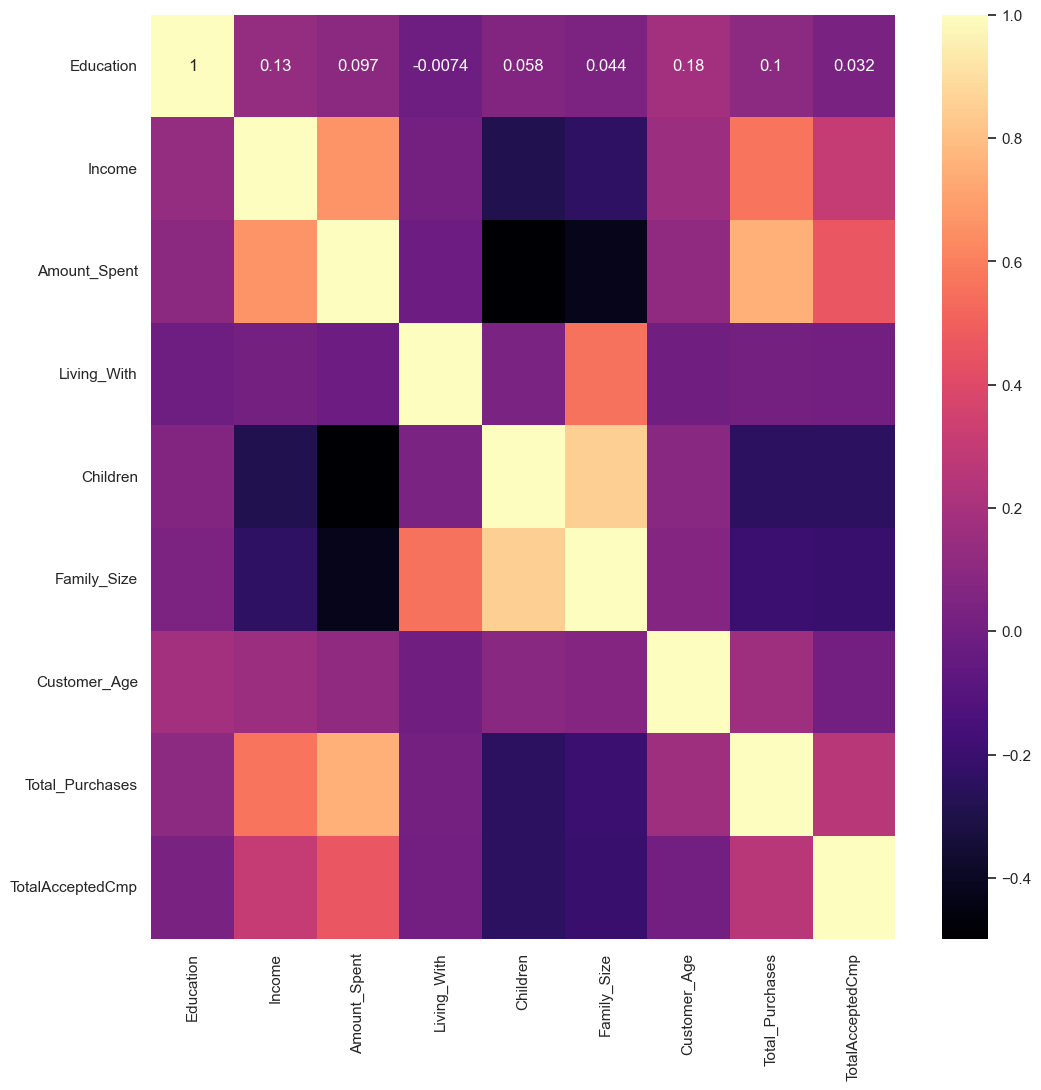

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='magma')

### Outlier Detection

In [46]:
numerical = ['Income', 'Amount_Spent', 'Customer_Age']

In [47]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [48]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Amount_Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Amount_Spent, dtype: int64 

*** Customer_Age outlier points*** 
 192    124
239    131
339    125
Name: Customer_Age, dtype: int64 



We will delete some of the outlier points.

In [49]:
df = df[(df['Customer_Age']<100)]
df = df[(df['Income']<300000)]

In [50]:
df.shape

(2236, 9)

### Feature Scaling

In [51]:
# Converting the Data Into the Standard Format
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [52]:
df.head(5)

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp
0,-0.411891,0.288947,1.680176,-1.347635,-1.264308,-1.758810,1.016868,1.319340,-0.438933
1,-0.411891,-0.262003,-0.962202,-1.347635,1.395139,0.445618,1.273264,-1.155857,-0.438933
2,-0.411891,0.918423,0.282541,0.742041,-1.264308,-0.656596,0.333146,0.798246,-0.438933
3,-0.411891,-1.182183,-0.918994,0.742041,0.065416,0.445618,-1.290693,-0.895310,-0.438933
4,1.123090,0.296187,-0.305762,0.742041,0.065416,0.445618,-1.034298,0.537699,-0.438933


##  Model Building

###  1.K-Means

In [53]:
df1 = df.copy()

In [54]:
km=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1)
    km.append(kmeans.inertia_)


Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster

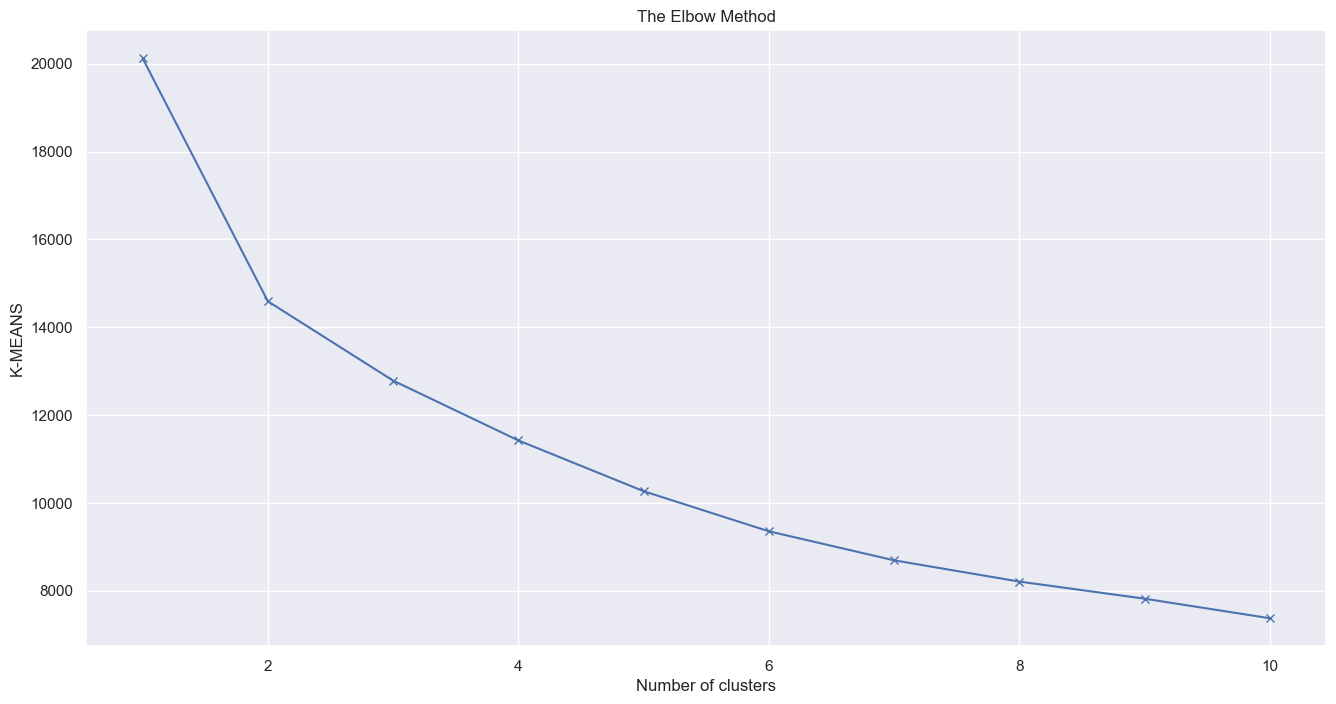

In [55]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11),km, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('K-MEANS')
plt.show()

We can understand from the plot that cluster = 2 is the best... 

In [56]:
kmeans=KMeans(n_clusters=2, random_state=42).fit(df1)
pred=kmeans.predict(df1)

In [57]:
df1['cluster_Kmeans'] = pred 

In [58]:
df1.head()

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp,cluster_Kmeans
0,-0.411891,0.288947,1.680176,-1.347635,-1.264308,-1.758810,1.016868,1.319340,-0.438933,0
1,-0.411891,-0.262003,-0.962202,-1.347635,1.395139,0.445618,1.273264,-1.155857,-0.438933,1
2,-0.411891,0.918423,0.282541,0.742041,-1.264308,-0.656596,0.333146,0.798246,-0.438933,0
3,-0.411891,-1.182183,-0.918994,0.742041,0.065416,0.445618,-1.290693,-0.895310,-0.438933,1
4,1.123090,0.296187,-0.305762,0.742041,0.065416,0.445618,-1.034298,0.537699,-0.438933,1


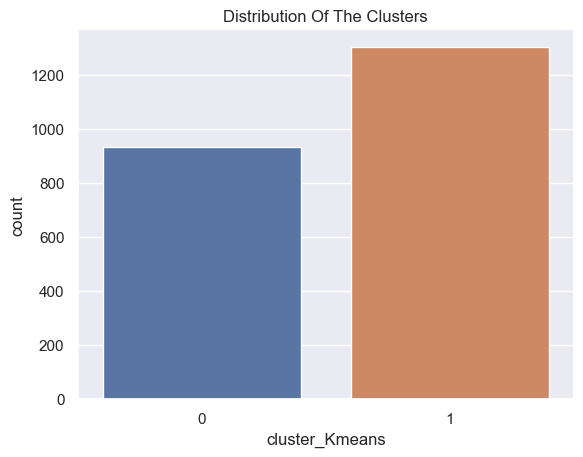

In [59]:
sns.countplot(x=df1["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

<Axes: xlabel='Amount_Spent', ylabel='Income'>

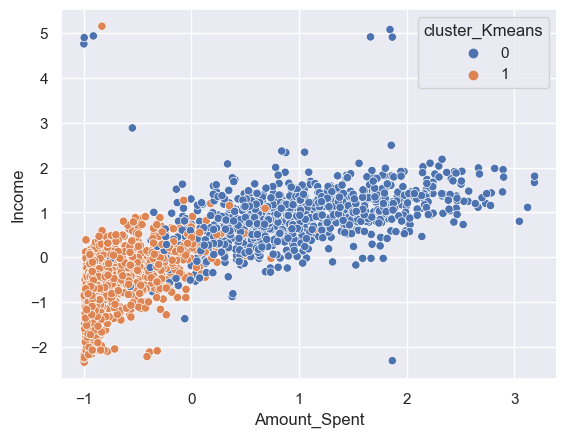

In [60]:
sns.scatterplot(x=df1['Amount_Spent'],y=df1['Income'],hue=df1['cluster_Kmeans'])

### 2.Hierarchical Clustering

In [61]:
df2=df.copy()

##### A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes.
     

##### The dendrogram from hierarchical clustering reveals the hierarchy of clusters at different levels, highlighting natural groupings in the data.

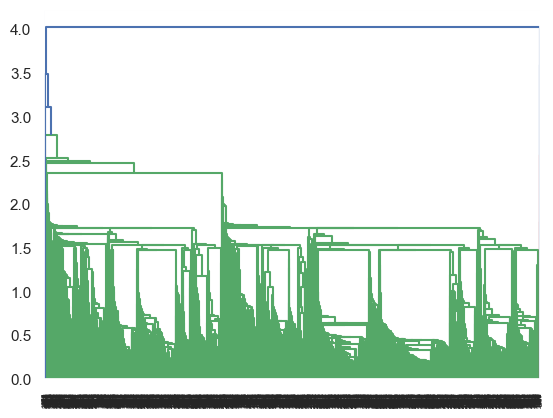

In [62]:
# We plot the Dendogram with the Minimum Distance
lk = hierarchy.linkage(df2,method='single', metric='euclidean') # Linkage is the distance between data point and clusters.
dendrogram = hierarchy.dendrogram(lk)

Here, clusters are overlapping with each other.

So, We plot the dendrogram by considering the maximum distance.

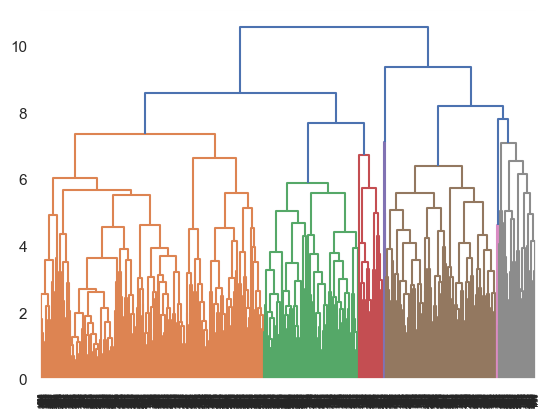

In [63]:
# We plot the Dendogram with the Maximum Distance
lk = hierarchy.linkage(df2,method='complete', metric='euclidean')
dendrogram = hierarchy.dendrogram(lk)

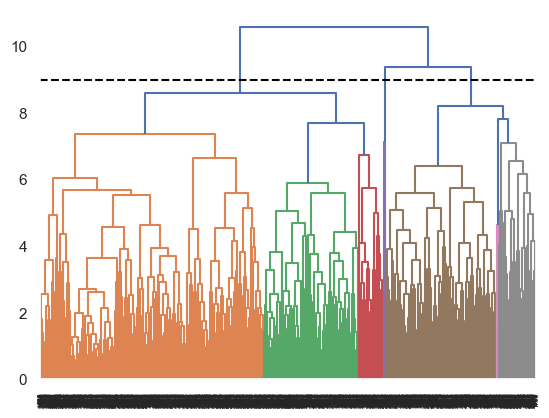

In [50]:
lk = hierarchy.linkage(df2,method='complete', metric='euclidean')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 9 , c = 'black', linestyle = '--')

In [64]:
hc = AgglomerativeClustering(n_clusters=3)
ypred = hc.fit_predict(df2)

In [68]:
ypred

array([0, 2, 0, ..., 0, 0, 2], dtype=int64)

In [69]:
df2['Cluster'] = ypred
df2.head()

,Education,Income,Amount_Spent,Living_With,Children,Family_Size,Customer_Age,Total_Purchases,TotalAcceptedCmp,Cluster
0,-0.411891,0.288947,1.680176,-1.347635,-1.264308,-1.758810,1.016868,1.319340,-0.438933,0
1,-0.411891,-0.262003,-0.962202,-1.347635,1.395139,0.445618,1.273264,-1.155857,-0.438933,2
2,-0.411891,0.918423,0.282541,0.742041,-1.264308,-0.656596,0.333146,0.798246,-0.438933,0
3,-0.411891,-1.182183,-0.918994,0.742041,0.065416,0.445618,-1.290693,-0.895310,-0.438933,1
4,1.123090,0.296187,-0.305762,0.742041,0.065416,0.445618,-1.034298,0.537699,-0.438933,1


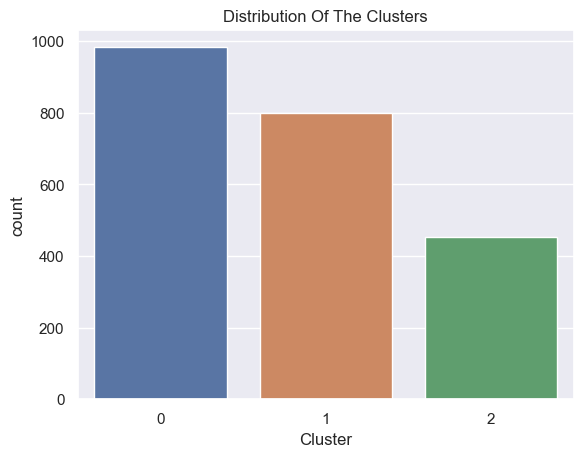

In [70]:
sns.countplot(x=df2["Cluster"])
plt.title("Distribution Of The Clusters")
plt.show()